### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**The independent variable in this experiment is the condition of the list of words, whether it's congruant or incongruant. The dependent variable is the time it takes (in seconds) to name all of the ink colors in lists of equal size.**

***

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**In this experiment we want to know if it takes longer to read the list of colors when they're incrongruant versus when they are congruant. To find out about this, it makes sense to compare the mean time it takes to read the incongruant list to the time it takes to read the congruant one. Intuitively it seems harder to read the incongruant list, so it is to be expected that it takes longer to read the list of colors when they are incongruant. Therefore our hypothese can be formulated as follows:**

$$H_0: \mu_{d} = 0$$
$$H_1: \mu_{d} > 0$$

**Where $ \mu_{d}$ is defined as the difference between the mean time for incongruant lists ($\mu_{ic}$) and the mean time for congruant lists ($\mu_{c}$).**

$$\mu_{d} = \mu_{ic} - \mu_{c}$$

**In words:**

**Null hypothesis: there is no difference between the time it takes to read the incongruant list and the congruant list.**<br>
**Alternative hypothesis: it takes longer to read the incongruant list.** 

***

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# import the packages we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats
import seaborn as sns
# loading the csv file
df = pd.read_csv('stroopdata.csv')
# taking a look at the first few rows
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# some summary statistics, including the requested measures of central tendency (mean) and variability (std deviation), 
# as well as the sample size (n=24)
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

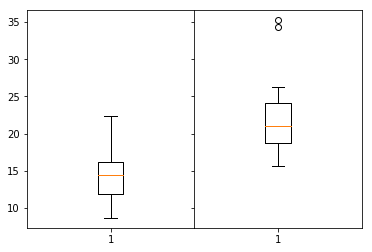

In [3]:
# Build the visualizations here
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
ax1.boxplot(df.Congruent)
ax2.boxplot(df.Incongruent)
plt.subplots_adjust(wspace = 0);

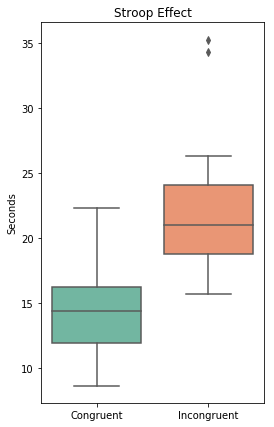

In [4]:
#Using seaborn to create nicer looking boxplots
fig, ax = plt.subplots(figsize = (4, 7))
sns.boxplot(data = df, palette = "Set2")
ax.set_title('Stroop Effect')
ax.set(ylabel='Seconds');

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


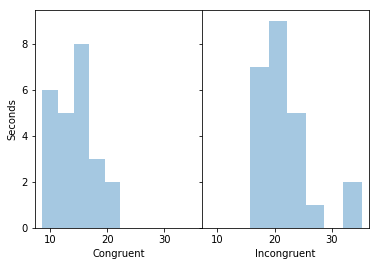

In [5]:
#plotting histograms of both sets
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, sharex = True)
sns.distplot(df.Congruent, ax=ax1, kde=False)
sns.distplot(df.Incongruent, ax=ax2, kde=False)
plt.subplots_adjust(wspace = 0)
ax1.set(ylabel='Seconds');

**The first visualization shows two side-by-side boxplots. From this we can tell that it seems to take longer to read the incongruent list. Furthermore, it appears that the spread for incongruent lists is wider. The second visualization shows two side-by-side histograms.**
***

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

**The test I will be using is a paired t-test, because we're interested in comparing the pairwise differences of the time it takes to read the lists (each test subject reads both the congruant en incongruant list). Before we can continue with this test, we have to check whether the assumptions hold:**
 - **Paired data assumption**
 - **Independence assumption**
 - **Normal population assumption**
 
**Considering the structure of this experiment, we can say that the first two assumptions hold. For the third assumption we'll have to check if the differences follow a Normal model.**

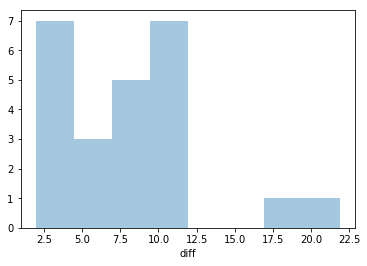

In [6]:
#add a new column with the difference between the reading times of both lists
df['diff'] = (df.Incongruent - df.Congruent)
#plot a histogram
sns.distplot(df['diff'], kde=False, bins=8);

**From the histogram we can see that the differences aren't exactly unimodal and symmetric, but it seems we can still proceed with the paired t-test. Calculating the t-statistic:**

In [7]:
# calculate the standard deviation of the differences
sd = df['diff'].std()
# calculate the mean difference
md = df['diff'].mean()
# calculate the standard error
se = sd / np.sqrt(24)
# calculate the t-statistic
tstat = md / se
tstat

8.020706944109957

**Critical value for a 99% confidence level with 23 (n-1) degrees of freedom is 2.807. Our observed t-statistic is way more extreme than that. We can perform this same test with a built-in function. This will also give us the exact P-value.**

In [8]:
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

**This is a 2-tailed P-value, so we can divide it by 2 to get the one-tailed value relevant to our hypothesis. In conclusion, we reject the null hypothesis that the difference in reading time between the congruant and incongruant list is 0 at the 99% confidence level. In other words, there is a statistically significant difference in how long it takes to read a list where the ink colors matches the word and a list of words where it doesn't.**
***

Sources:

 - https://seaborn.pydata.org/generated/seaborn.boxplot.html
 - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
 - https://seaborn.pydata.org/generated/seaborn.distplot.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
 - Sharpe, Norean Radke, et al. *Business Statistics*. Pearson, 2018

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**On average reading the full incongruent lists takes longer, this seems to be the case because it's harder to read a list where the colors don't match up. A similar task would be to have a set of numbers written out, but the number of times the word is written is not necessarily congruent with the number. For example:<br>
two two two two<br>
five five**